In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [4]:
data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


# EDA

In [5]:
data.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
data['x1']

0      -119.366669
1      -101.108044
2      -130.278658
3      -114.703415
4      -119.366669
           ...    
2222     98.714112
2223     96.633331
2224     85.673940
2225     78.958862
2226    109.624009
Name: x1, Length: 2227, dtype: float64

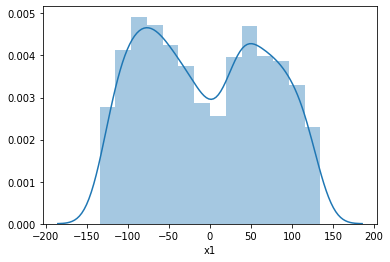

In [7]:
import seaborn as sns
sns.distplot(data['x1'],kde = True,)

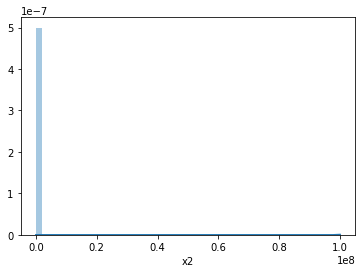

In [8]:
sns.distplot(data['x2'],kde = True)

In [9]:
data['x1'].mean()

-4.818766123605403

In [10]:
data['x1'].median()

-9.836555486

In [11]:
data['x1'].mode()

0   -118.366669
dtype: float64

In [12]:
data['x2'].mean()

89476.25894136279

In [13]:
data['x2'].median()

-1.04615092

In [14]:
data['x2'].mode()

0   -113.0
1    -55.0
dtype: float64

In [15]:
data['x1']=data['x1'].fillna(data['x1'].mode()[0])
data['x2']=data['x2'].fillna(data['x2'].mode()[1])

In [16]:
data.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [17]:
data.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-5.073701,8.935565e+04,0.442299
std,75.048455,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-72.170666,-7.997687e+01,0.000000
50%,-10.149873,-1.566092e+00,0.000000
75%,59.633331,6.374987e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [18]:
data['y']

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2227, dtype: int64

# outliers Detections

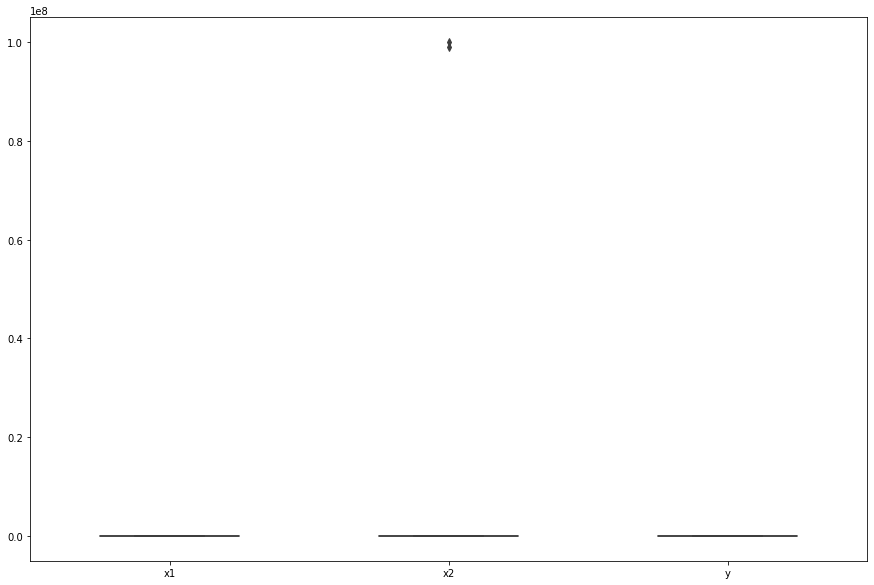

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=5)

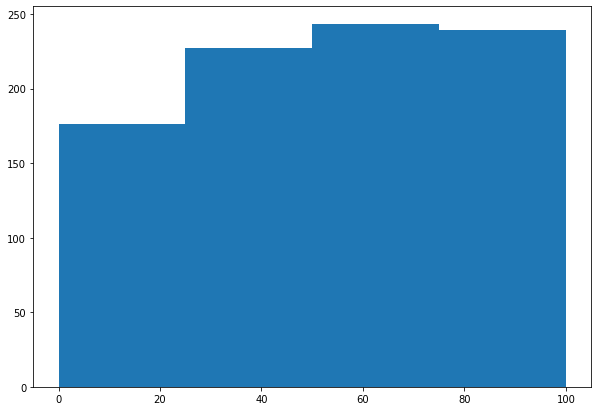

In [20]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['x2'], bins = [0, 25, 50, 75, 100])
  
# Show plot
plt.show()

In [21]:
hi = data['x2']

In [22]:
hi

0       1.150000e+02
1       9.777716e+01
2       1.067677e+02
3       1.011955e+02
4       1.150000e+02
            ...     
2222    8.964312e+01
2223    9.100000e+01
2224    1.038393e+02
2225    7.860537e+01
2226    1.000000e+08
Name: x2, Length: 2227, dtype: float64

In [23]:
q = data['x2'].quantile(0.98)
data_cleaned = data[data['x2']<q]

In [24]:
data_cleaned

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
...,...,...,...
2221,88.129639,107.514918,0
2222,98.714112,89.643117,0
2223,96.633331,91.000000,0
2224,85.673940,103.839270,0


# STEP 2
# A) Logistic Regression

In [37]:
X=data.drop(columns=['y'])
y=data['y']

In [38]:
X

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108044,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [39]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2227, dtype: int64

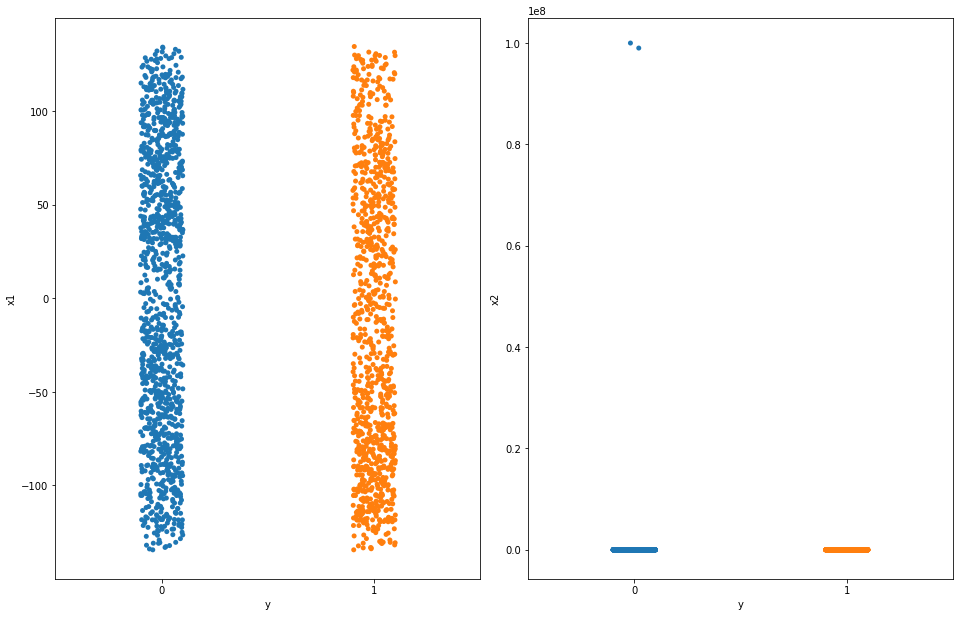

In [40]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [41]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [42]:
X_scaled

array([[-1.52326436e+00, -2.99400579e-02],
       [-1.27991858e+00, -2.99458361e-02],
       [-1.66869627e+00, -2.99428198e-02],
       ...,
       [ 1.20945890e+00, -2.99438023e-02],
       [ 1.11996224e+00, -2.99522682e-02],
       [ 1.52865864e+00,  3.35198187e+01]])

In [43]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.001392,x1
1,1.001392,x2


In [44]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [45]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Predicting the Test set results
y_pred = log_reg.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5673249551166966

In [134]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[171, 134],
       [148, 104]], dtype=int64)

In [135]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [136]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)

In [137]:
Accuracy

0.49371633752244165

In [138]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.5606557377049181

In [139]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.5360501567398119

In [140]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.5480769230769231

#  D) Decison Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [80]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['x1', 'x2']

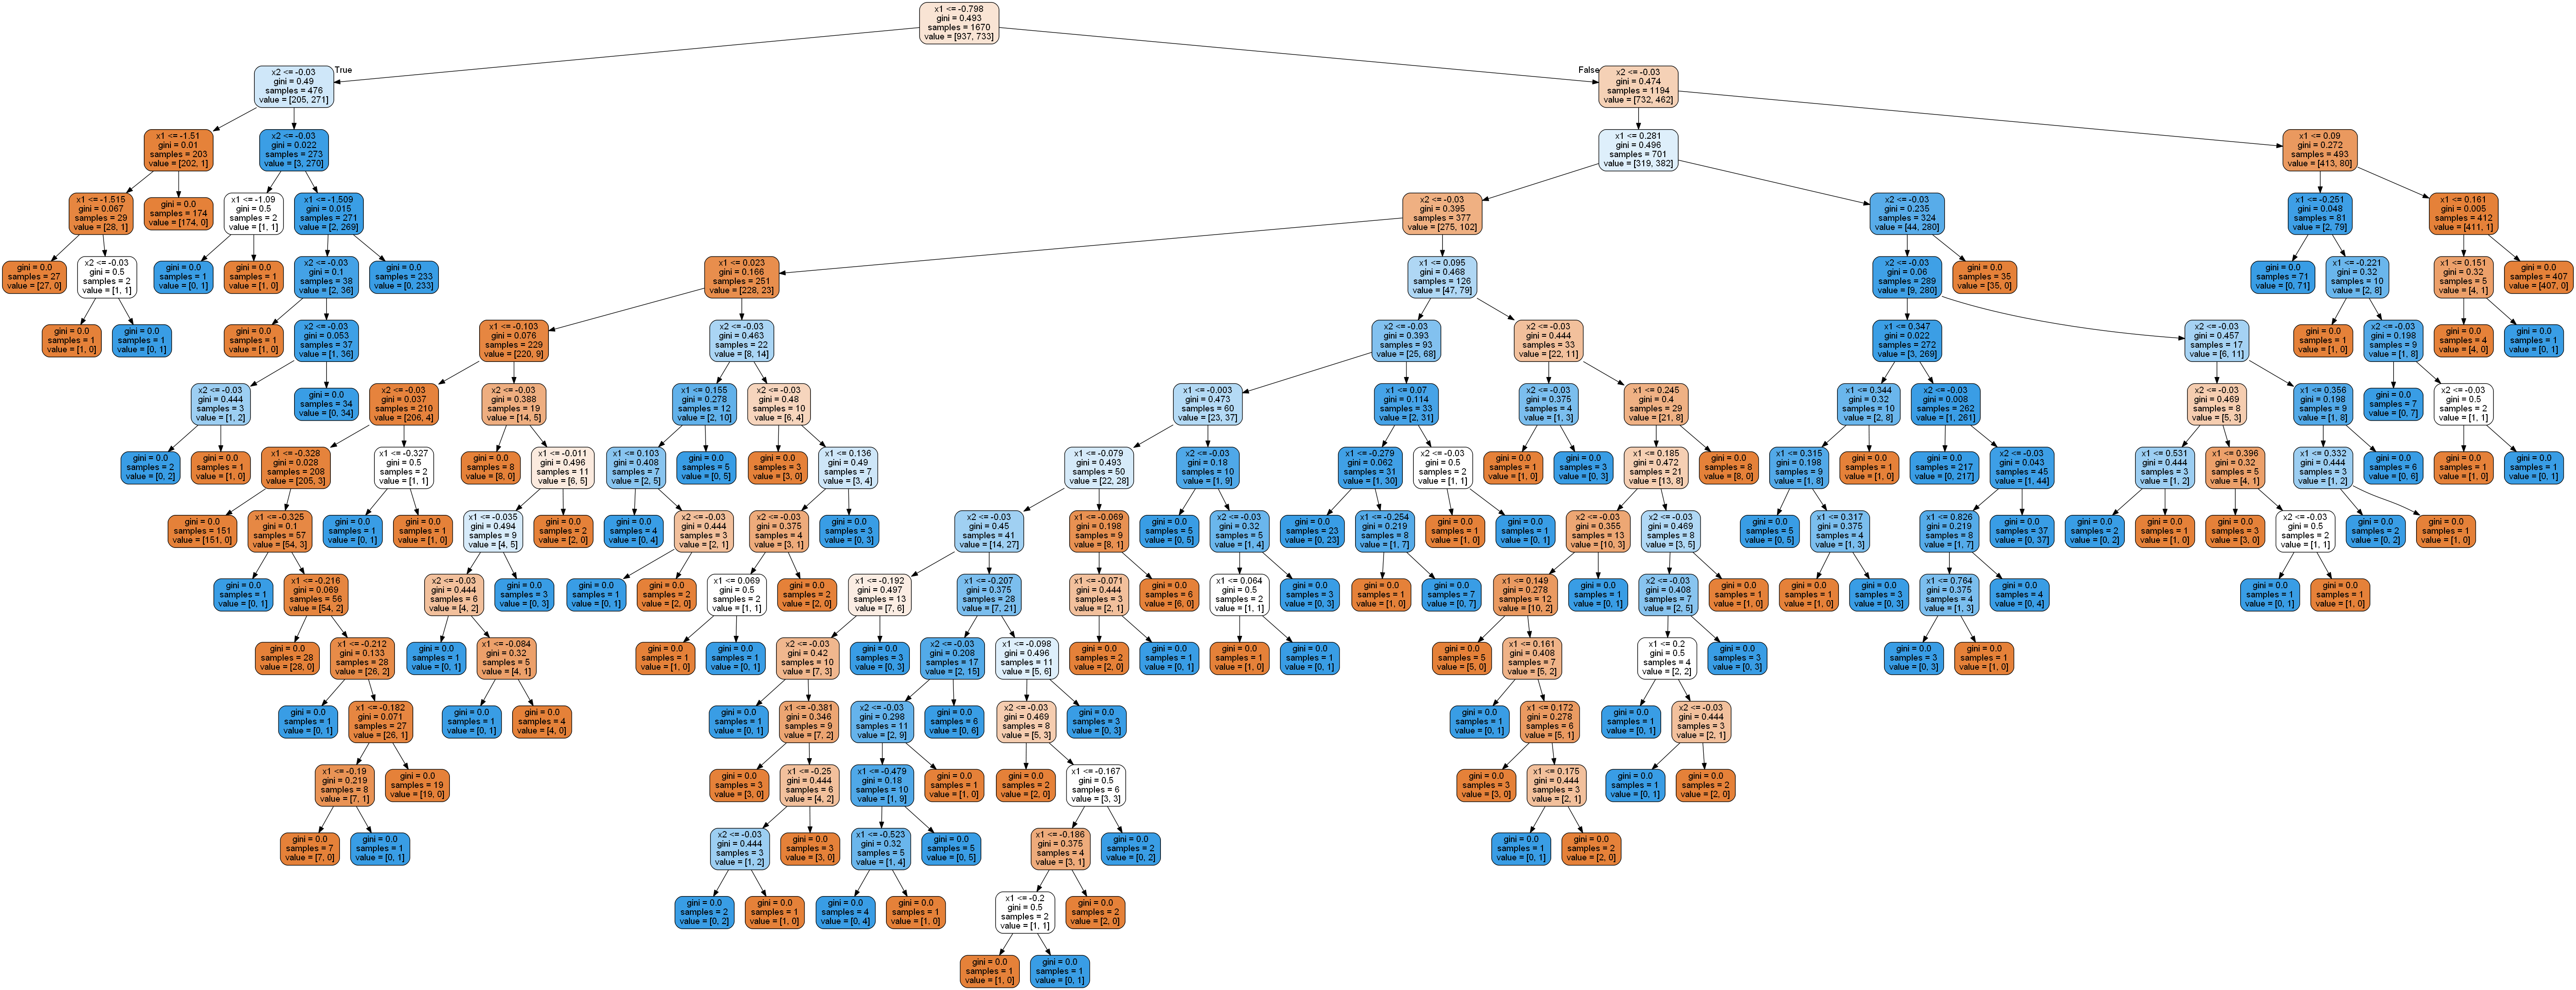

In [82]:
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [83]:
clf.score(x_train,y_train)

1.0

In [84]:
py_pred = clf.predict(x_test)

In [85]:
clf.score(x_test,y_test)

0.9245960502692998

In [86]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [87]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [89]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'random'}


In [90]:
grid_search.best_score_

0.9502994011976048

In [93]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =18, min_samples_leaf= 1, min_samples_split= 9, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [94]:
clf.score(x_test,y_test)

0.9353680430879713

# E) KNN 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

In [66]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
y_pred = knn.predict(x_test)
knn.score(x_train,y_train)

0.7245508982035929

In [68]:
knn.score(x_test,y_test)

0.49371633752244165

In [69]:
# Let's try to increase the accuracy by using hyperparameter tuning.

In [71]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
             }

In [72]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [73]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.566, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.566, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.521, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.548, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.584, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.578, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.602, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.617, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.572, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.563, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.593, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.569, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.599, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.614, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, score=0.581, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.596, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.548, 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.578, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.602, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.617, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.572, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.563, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.572, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.602, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.560, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.608, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.611, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.578, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.581, 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.521, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.548, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.584, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.578, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.602, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.617, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.572, total= 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.572, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.602, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.560, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.608, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.611, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.578, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.581, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.584, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.563, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.581, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.611, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.575, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.575, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.578, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.578, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.581, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.572, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.575, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.605, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.566, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.566, total=   0.0s
[

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.581, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.611, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=7, score=0.575, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.575, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.578, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.620, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=9, score=0.590, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.578, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.581, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.572, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.575, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.605, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.566, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.566, total=   0.1s
[CV

[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.584, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.563, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.581, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.611, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, score=0.575, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.575, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.578, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.635, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.572, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.602, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.560, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.608, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.611, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.578, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, score=0.572, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.584, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.563, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.581, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.611, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.575, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.575, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.548, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.587, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.635, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.572, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.602, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.560, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=12, score=0.608, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   17.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [74]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [75]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =9)

In [76]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [77]:
knn.score(x_train,y_train)



0.6892215568862275

In [78]:
knn.score(x_test,y_test)

0.5278276481149012

# C) SVM WITH RBF KERNEL

In [111]:
from sklearn.svm import SVC

In [112]:
model=SVC()

In [114]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test,model.predict(x_test))

0.5673249551166966

In [118]:
#### Implementing Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [121]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [122]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [123]:
grid.best_params_

{'C': 50, 'gamma': 1}

In [124]:
model_new=SVC(C=50, gamma=1)
model_new.fit(x_train,y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [126]:
accuracy_score(y_test,model_new.predict(x_test))

0.5601436265709157

# SVM with Linear Kernel

In [127]:
from sklearn import svm

In [128]:
X

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108044,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [129]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2227, dtype: int64

In [130]:
C = 1.0 

In [131]:
svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)


In [ ]:
# create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# STEP : 4

# * By using Logistic Regression ,we got accuracy :0.5673249551166966
# * by using decision tree ,we got accuracy as 0.9245960502692998  after hyperparameter tuning we got accuracy as 0.9353680430879713
# * so our accuracy is increased after hyperparameter tuning.
# * by uisng knn classifier we got accuracy as 0.49371633752244165  after hyperparameter tuning we got accuracy as 0.5278276481149012
# * by using svm we got accuracy as 0.5601436265709157
# * we should choose the model which have good accuracy ,so decision tree have highest accuracy with  93